<a href="https://colab.research.google.com/github/camdenjohnsonn/IrisNNModel/blob/main/IrisNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [97]:
class Model(nn.Module):
  def __init__(self, in_features=4, h1=8, h2=9, out_features = 3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x


In [98]:
torch.manual_seed(41)
model = Model()

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [100]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
df = pd.read_csv(url)

In [101]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [102]:
df['species'] = df['species'].replace('setosa', 0)
df['species'] = df['species'].replace('versicolor', 1)
df['species'] = df['species'].replace('virginica', 2)
df

/tmp/ipython-input-44200851.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['species'] = df['species'].replace('virginica', 2)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [103]:
X = df.drop('species', axis = 1)
y = df['species']

In [104]:
X = X.values
y = y.values

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 41)

In [107]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [108]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [109]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = .01)

In [110]:
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(X_train)

  loss = criterion(y_pred, y_train)

  losses.append(loss.detach().numpy())

  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.1251550912857056
Epoch: 10 and loss: 1.0096259117126465
Epoch: 20 and loss: 0.8157405853271484
Epoch: 30 and loss: 0.585706353187561
Epoch: 40 and loss: 0.3999636471271515
Epoch: 50 and loss: 0.26768800616264343
Epoch: 60 and loss: 0.17942361533641815
Epoch: 70 and loss: 0.12151690572500229
Epoch: 80 and loss: 0.0860118493437767
Epoch: 90 and loss: 0.06520850956439972


Text(0, 0.5, 'loss')

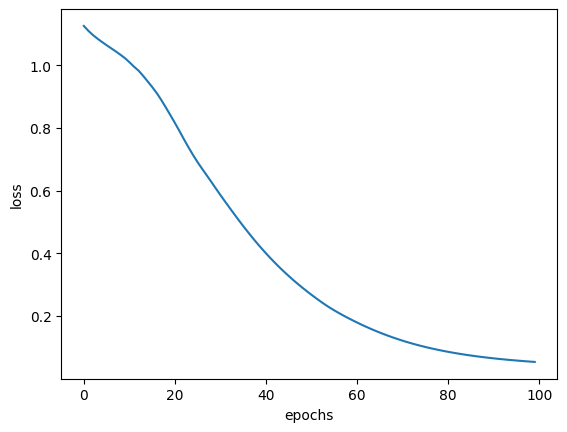

In [113]:
plt.plot(range(epochs), losses)
plt.xlabel('epochs')
plt.ylabel('loss')

In [115]:
# test with no back prop
with torch.no_grad(): # turns off back prop
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, y_test)

loss


tensor(0.1315)

In [119]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    print(f'{i +1}.) {str(y_val)} \t{y_test[i]}')

    if y_val.argmax().item() == y_test[i]:
      correct += 1

print(f'We got {correct} correct')

1.) tensor([-5.8760,  4.4628,  6.5124]) 	2
2.) tensor([-7.5436,  4.1670,  9.7255]) 	2
3.) tensor([-8.4504,  5.1271, 10.1987]) 	2
4.) tensor([-4.3398,  5.6267,  2.5608]) 	1
5.) tensor([-7.1825,  4.8754,  8.2992]) 	2
6.) tensor([-3.3974,  5.3463,  1.2803]) 	1
7.) tensor([-5.9231,  4.9822,  5.9997]) 	2
8.) tensor([-4.2881,  5.7003,  2.3889]) 	1
9.) tensor([-6.5356,  4.9257,  7.1260]) 	2
10.) tensor([-8.0509,  4.4129, 10.3286]) 	2
11.) tensor([-5.6762,  4.9500,  5.6215]) 	2
12.) tensor([ 4.5662, -2.2476, -2.8911]) 	0
13.) tensor([ 4.2571, -1.9967, -2.7330]) 	0
14.) tensor([-2.1108,  4.0515,  0.5799]) 	1
15.) tensor([ 3.4575, -1.2098, -2.3514]) 	0
16.) tensor([-5.4724,  5.1165,  5.0934]) 	2
17.) tensor([ 4.0557, -1.7949, -2.6492]) 	0
18.) tensor([-5.8075,  4.6053,  6.2458]) 	1
19.) tensor([ 4.4343, -2.1392, -2.8242]) 	0
20.) tensor([ 3.4528, -1.2514, -2.3660]) 	0
21.) tensor([-2.6189,  4.5619,  0.8574]) 	1
22.) tensor([-7.7412,  4.7377,  9.4199]) 	2
23.) tensor([ 3.5744, -1.3221, -2.4135]) 

In [122]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [124]:
with torch.no_grad():
  guess = model(new_iris)
  print(guess)

tensor([ 4.5365, -2.2383, -2.8684])


In [125]:
guess.argmax().item()

0

In [126]:
torch.save(model.state_dict(), 'Iris_Model.pt')

In [127]:
new_model = Model()
new_model.load_state_dict(torch.load('Iris_Model.pt'))

<All keys matched successfully>

In [128]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)